In [97]:
from pymongo import MongoClient
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from bson import ObjectId
import random
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report
from dotenv import load_dotenv

load_dotenv()
mongo_uri = os.getenv('MONGO_URI')
client = MongoClient(mongo_uri)
db = client[os.getenv('MONGO_DB_NAME')]

users_collection = db['users']
posts_collection = db['posts']
likes_collection = db['likes']
answers_collection = db['answers']  # Add answers collection



In [98]:
def predict_rating(user_idx, post_idx, train_matrix, user_similarity):
    sim_scores = user_similarity[user_idx]
    item_ratings = train_matrix[:, post_idx]
    non_zero_ratings = item_ratings[item_ratings != 0]

    weighted_sum = 0
    similarity_sum = 0
    for idx in range(len(non_zero_ratings)):
        similarity = sim_scores[idx]
        weighted_sum += similarity * item_ratings[idx]
        similarity_sum += similarity

    if similarity_sum == 0:
        return 0
    return weighted_sum / similarity_sum



post_id:  {'66a7ed8dd84c8562211dc5f1': 0, '66a7ed8dd84c8562211dc5f2': 1, '66a7ed8dd84c8562211dc5f3': 2, '66a7ed8dd84c8562211dc5f4': 3, '66a7ed8dd84c8562211dc5f5': 4, '66a7ed8dd84c8562211dc5f6': 5, '66a7ed8dd84c8562211dc5f7': 6, '66a7ed8dd84c8562211dc5f8': 7, '66a7ed8dd84c8562211dc5f9': 8, '66a7ed8dd84c8562211dc5fa': 9, '66a7ed8dd84c8562211dc5fb': 10, '66a7ed8dd84c8562211dc5fc': 11, '66a7ed8dd84c8562211dc5fd': 12, '66a7ed8dd84c8562211dc5fe': 13, '66a7ed8dd84c8562211dc5ff': 14, '66a7ed8dd84c8562211dc600': 15, '66a7ed8dd84c8562211dc601': 16, '66a7ed8dd84c8562211dc602': 17, '66a7ed8dd84c8562211dc603': 18, '66a7ed8dd84c8562211dc604': 19, '66a7ed8dd84c8562211dc605': 20, '66a7ed8dd84c8562211dc606': 21, '66a7ed8dd84c8562211dc607': 22, '66a7ed8dd84c8562211dc608': 23, '66a7ed8dd84c8562211dc609': 24, '66a7ed8dd84c8562211dc60a': 25, '66a7ed8dd84c8562211dc60b': 26, '66a7ed8dd84c8562211dc60c': 27, '66a7ed8dd84c8562211dc60d': 28, '66a7ed8dd84c8562211dc60e': 29, '66a7ed8dd84c8562211dc60f': 30, '66a7ed

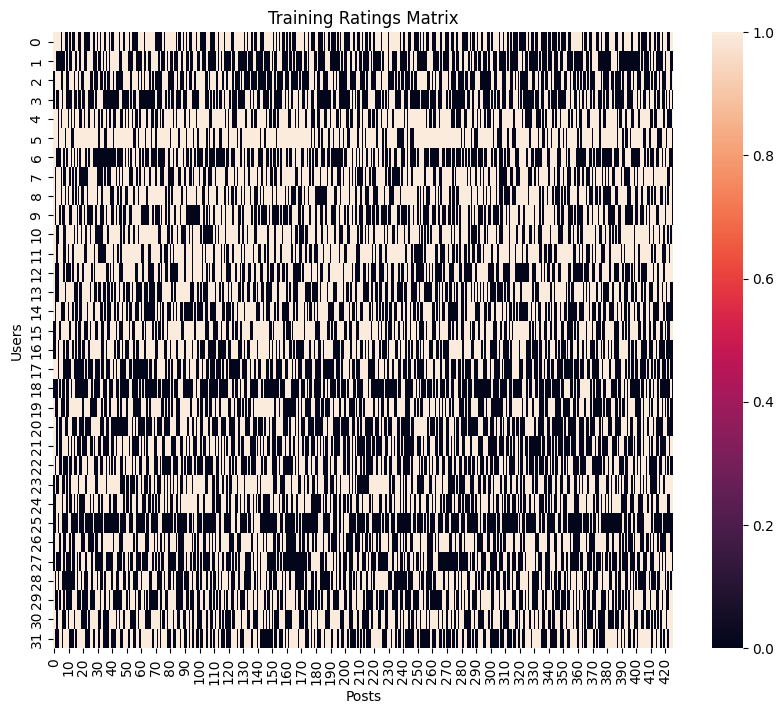

------------------------------------------------------
user similarity shape:  (32, 32)
user similarity:  [[1.         0.44636945 0.48106148 ... 0.55781205 0.51931809 0.54833   ]
 [0.44636945 1.         0.34985899 ... 0.43876828 0.41861723 0.46483484]
 [0.48106148 0.34985899 1.         ... 0.45732108 0.47900125 0.44595087]
 ...
 [0.55781205 0.43876828 0.45732108 ... 1.         0.5016725  0.50359206]
 [0.51931809 0.41861723 0.47900125 ... 0.5016725  1.         0.54161383]
 [0.54833    0.46483484 0.44595087 ... 0.50359206 0.54161383 1.        ]]
------------------------------------------------------


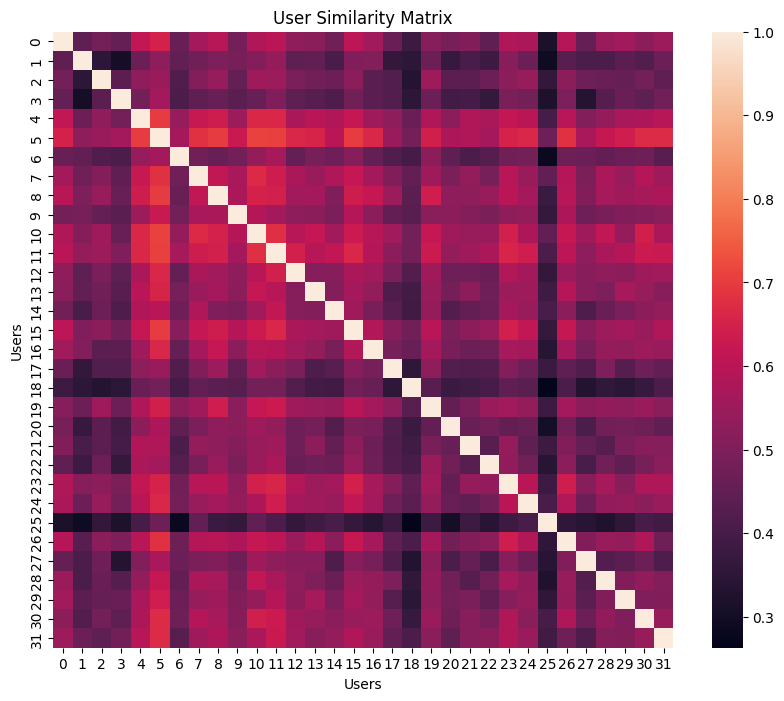

Processing recommendations for user index: 0
post score rate:  [11.10633469  7.89934215  7.9681279   8.37497063 10.69172848  9.78553288
  6.03294544  7.86051936  9.12455435  9.25065224  9.2560098   7.46803593
  8.02278655  8.97928639  9.83261781  8.3230604   7.90953371  5.69567836
  9.08348141  6.6928734   8.14358367 10.17566092 10.09829127  9.17540108
  9.22665739  5.36899613  7.04720698 10.30195478 10.40938749  9.37844758
  9.82791858  7.98040526  8.88450059  9.30460834 10.30267779  7.88214492
  6.68551662  9.3477772   7.41877415  9.65497431  8.65387313  9.8681506
  9.80992574  9.72848656  8.459259    7.25929316  8.33313473  8.72846935
  8.32687882 11.48114662  7.20649522  8.91655139  8.51069119 11.82523958
  7.24530728 10.0508658  11.14990868  6.52513667 11.84119664  6.08979908
 10.13252055  6.4862422   8.50249726 10.0189136   9.55016146  8.41192534
 10.17348786 10.56202382  7.04561519  7.15857502  8.14565309 10.54042573
 10.1932007   9.12147507  9.02100684  7.92311785  8.36725437  

c:\Users\estar\Project Python\Collaborative Filtering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\estar\Project Python\Collaborative Filtering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\estar\Project Python\Collaborative Filtering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

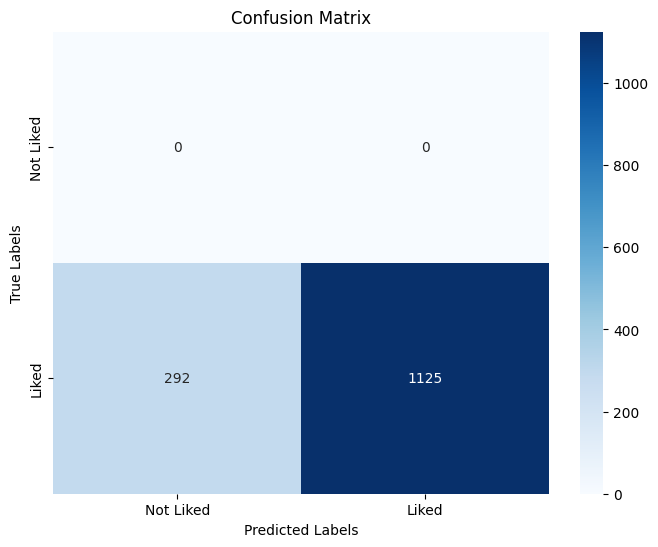

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.89      1417

    accuracy                           0.79      1417
   macro avg       0.50      0.40      0.44      1417
weighted avg       1.00      0.79      0.89      1417

Mean Absolute Error: 0.20606916019760058
Precision: 1.0
Recall: 0.7939308398023994
F1 Score: 0.8851298190401259
Precision: 1.0
Recall: 0.7939308398023994
F1 Score: 0.8851298190401259


c:\Users\estar\Project Python\Collaborative Filtering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\estar\Project Python\Collaborative Filtering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\estar\Project Python\Collaborative Filtering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

(array([[1., 1., 1., ..., 0., 1., 1.],
        [1., 1., 0., ..., 1., 0., 0.],
        [0., 1., 1., ..., 1., 0., 1.],
        ...,
        [1., 0., 0., ..., 1., 1., 1.],
        [1., 1., 0., ..., 1., 1., 1.],
        [1., 0., 0., ..., 1., 1., 1.]]),
 {'669c0b8e2ea43ac3b0c83bd2': ['66a7ed8ed84c8562211dc6fe',
   '66a7ed8ed84c8562211dc6bf',
   '66a7ed8dd84c8562211dc60c',
   '66a7ed8ed84c8562211dc75e',
   '66a7ed8ed84c8562211dc653'],
  '669c0b8e2ea43ac3b0c83bd3': ['66a7ed8ed84c8562211dc64d',
   '66a7ed8ed84c8562211dc655',
   '66a7ed8ed84c8562211dc789',
   '66a7ed8ed84c8562211dc6fe',
   '66a7ed8ed84c8562211dc644'],
  '669c0b8e2ea43ac3b0c83bd4': ['66a7ed8ed84c8562211dc789',
   '66a7ed8ed84c8562211dc6bf',
   '66a7ed8ed84c8562211dc67e',
   '66a7ed8dd84c8562211dc5f1',
   '66a7ed8ed84c8562211dc652'],
  '669c0b8e2ea43ac3b0c83bd5': ['66a7ed8ed84c8562211dc796',
   '66a7ed8ed84c8562211dc652',
   '66a7ed8ed84c8562211dc67e',
   '66a7ed8ed84c8562211dc6af',
   '66a7ed8dd84c8562211dc5f1'],
  '669c0b8e2ea4

In [99]:
def train_model():
    # Fetch data from MongoDB
    users = list(users_collection.find())
    posts = list(posts_collection.find())
    likes = list(likes_collection.find())
    answers = list(answers_collection.find())  # Fetch answers

    # Create mappings for user and post IDs (using string IDs)
    user_ids = {str(user['_id']): idx for idx, user in enumerate(users)}
    post_ids = {str(post['_id']): idx for idx, post in enumerate(posts)}

    print('post_id: ', post_ids , 'user_ids: ', user_ids)
    
    # Create a mapping for post topics
    post_topics = {str(post['_id']): post['topic'] for post in posts}

    # Create rating matrix
    num_users = len(users)
    num_posts = len(posts)
    ratings_matrix = np.zeros((num_users, num_posts))

    for like in likes:
        user_id_str = str(like['user_id'])
        post_id_str = str(like['post_id'])
        
        # Debug output: Check if the ID exists in the mappings
        if user_id_str not in user_ids:
            print(f"User ID {user_id_str} not found in user_ids mapping")
        if post_id_str not in post_ids:
            print(f"Post ID {post_id_str} not found in post_ids mapping")

        user_idx = user_ids[user_id_str]
        post_idx = post_ids[post_id_str]
        
        ratings_matrix[user_idx, post_idx] = 1

    for answer in answers:
        user_id_str = str(answer['user_id'])
        post_id_str = str(answer['post_id'])
        
        # Debug output: Check if the ID exists in the mappings
        if user_id_str not in user_ids:
            print(f"User ID {user_id_str} not found in user_ids mapping")
        if post_id_str not in post_ids:
            print(f"Post ID {post_id_str} not found in post_ids mapping")

        user_idx = user_ids[user_id_str]
        post_idx = post_ids[post_id_str]
        
        ratings_matrix[user_idx, post_idx] = 1
        
    # Build user-topic profiles
    user_topic_preferences = {user_idx: {} for user_idx in range(num_users)}
    
    # Normalize topic preferences
    for user_idx in user_topic_preferences:
        total_likes = sum(user_topic_preferences[user_idx].values())
        for topic in user_topic_preferences[user_idx]:
            user_topic_preferences[user_idx][topic] /= total_likes


    def create_train_test_split(ratings_matrix, test_size=0.2):
        num_users, num_posts = ratings_matrix.shape
        # Create an empty matrix for train and test
        train_matrix = np.copy(ratings_matrix)
        test_matrix = np.zeros_like(ratings_matrix)

        for user in range(num_users):
            # Find the indices of non-zero entries (interactions) for the current user
            non_zero_indices = np.nonzero(ratings_matrix[user])[0]
            
            if len(non_zero_indices) < 2:
                continue  # Skip users with less than two interactions
            
            # Split indices into train and test
            train_indices, test_indices = train_test_split(non_zero_indices, test_size=test_size, random_state=42)
            
            # Update train and test matrices
            train_matrix[user, train_indices] = ratings_matrix[user, train_indices]
            test_matrix[user, test_indices] = ratings_matrix[user, test_indices]

        return train_matrix, test_matrix

    # Train-test split
    train_matrix, test_matrix = create_train_test_split(ratings_matrix, test_size=0.2)

    # Visualize the ratings matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(train_matrix)
    plt.title('Training Ratings Matrix')
    plt.xlabel('Posts')
    plt.ylabel('Users')
    plt.show()

    # Calculate cosine similarity between users
    user_similarity = cosine_similarity(train_matrix)
    print('------------------------------------------------------')
    print('user similarity shape: ', user_similarity.shape)
    print('user similarity: ', user_similarity)
    print('------------------------------------------------------')

    # Visualize the user similarity matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(user_similarity)
    plt.title('User Similarity Matrix')
    plt.xlabel('Users')
    plt.ylabel('Users')
    plt.show()
    
    # Function to recommend posts for a given user based on similar users' likes
    def recommend_posts(user_idx, num_recommendations=5):
        print('Processing recommendations for user index:', user_idx)
        sim_scores = user_similarity[user_idx]
        
        similar_users = np.argsort(sim_scores)[::-1][1:]  # Exclude the user itself
        
        post_scores = np.zeros(num_posts)
    
        for similar_user in similar_users:
            post_scores += sim_scores[similar_user] * train_matrix[similar_user]

        # Incorporate topic preferences into the scoring
        for post_idx in range(num_posts):
            post_id_str = list(post_ids.keys())[post_idx]
            topic = post_topics[post_id_str]
            if topic in user_topic_preferences[user_idx]:
                post_scores[post_idx] *= (1 + user_topic_preferences[user_idx][topic])

        print('post score rate: ',  post_scores[train_matrix[user_idx] > 0])
        print('------------------------------------------------------')
        post_scores[train_matrix[user_idx] > 0] = 0
        print('post score filter: ',  post_scores[train_matrix[user_idx] > 0])
        print('------------------------------------------------------')
        recommended_post_indices = np.argsort(post_scores)[::-1][:num_recommendations]
        return recommended_post_indices

    # Generate recommendations for all users and save to a dictionary
    recommendations = {}
    for user_id_str, user_idx in user_ids.items():
        if user_idx >= user_similarity.shape[0]:
            print(f"User index {user_idx} is out of bounds for user_similarity with shape {user_similarity.shape}")
            continue
        recommended_posts = recommend_posts(user_idx, num_recommendations=5)
        print('------------------------------------------------------')
        print('recommended posts: ', recommended_posts)
        print('------------------------------------------------------')
        recommended_post_ids = [list(post_ids.keys())[list(post_ids.values()).index(post_idx)] for post_idx in recommended_posts]
        recommendations[user_id_str] = recommended_post_ids

    # Save recommendations to a JSON file
    with open('recommendations.json', 'w') as f:
        json.dump(recommendations, f)

    # Evaluate model
    actual_ratings = []
    predicted_ratings = []

    for user_idx in range(len(test_matrix)):
        for post_idx in range(num_posts):
            if test_matrix[user_idx, post_idx] != 0:
                actual_ratings.append(test_matrix[user_idx, post_idx])
                predicted_ratings.append(predict_rating(user_idx, post_idx, train_matrix, user_similarity))
                
                
    
    # Tambahkan pengecekan untuk memastikan kedua array tidak kosong
    if len(actual_ratings) == 0 or len(predicted_ratings) == 0:
        print("Warning: Salah satu atau kedua array kosong.")
    else:
        
        # Menetapkan ambang batas
        threshold = 0.5  
        
        # Mengubah prediksi ke dalam format biner berdasarkan ambang batas
        binary_predictions = [1 if p >= threshold else 0 for p in predicted_ratings]
        binary_actuals = [1 if a >= threshold else 0 for a in actual_ratings]
        
        # Menghitung MAE
        mae = mean_absolute_error(binary_actuals, binary_predictions)
        # Menghitung Precision, Recall, F1 Score, dan Confusion Matrix
        conf_matrix = confusion_matrix(binary_actuals, binary_predictions)
        class_report = classification_report(binary_actuals, binary_predictions, output_dict=True)
        
        # Visualisasi Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()
        
        # Menampilkan laporan klasifikasi
        print("Classification Report:")
        print(classification_report(binary_actuals, binary_predictions))

        # Menampilkan MAE
        print(f'Mean Absolute Error: {mae}')
        
        # Menghitung dan menampilkan Precision, Recall, dan F1 Score
        precision = class_report['1']['precision']
        recall = class_report['1']['recall']
        f1 = class_report['1']['f1-score']

        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1}')
        
        # Menghitung TP, FP, dan FN
        TP = FP = FN = 0

        for actual, predicted in zip(actual_ratings, predicted_ratings):
            if predicted >= threshold:
                if actual == 1:
                    TP += 1
                else:
                    FP += 1
            elif actual >= threshold:
                FN += 1

        # Menghitung Precision dan Recall
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0

        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
            # Menghitung F1 Score
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        print(f'F1 Score: {f1}')


    return train_matrix, recommendations, user_similarity

train_model()

In [100]:
# Load recommendations from JSON file
with open('recommendations.json', 'r') as f:
    recommendations = json.load(f)

# Convert recommendations to a pandas DataFrame for analysis
recommendations_df = pd.DataFrame.from_dict(recommendations, orient='index')
recommendations_df.columns = [f'Recommendation_{i+1}' for i in range(recommendations_df.shape[1])]
recommendations_df.reset_index(inplace=True)
recommendations_df.rename(columns={'index': 'User_ID'}, inplace=True)

# Display the first few rows of the recommendations DataFrame
recommendations_df.head()


,User_ID,Recommendation_1,Recommendation_2,Recommendation_3,Recommendation_4,Recommendation_5
0,669c0b8e2ea43ac3b0c83bd2,66a7ed8ed84c8562211dc6fe,66a7ed8ed84c8562211dc6bf,66a7ed8dd84c8562211dc60c,66a7ed8ed84c8562211dc75e,66a7ed8ed84c8562211dc653
1,669c0b8e2ea43ac3b0c83bd3,66a7ed8ed84c8562211dc64d,66a7ed8ed84c8562211dc655,66a7ed8ed84c8562211dc789,66a7ed8ed84c8562211dc6fe,66a7ed8ed84c8562211dc644
2,669c0b8e2ea43ac3b0c83bd4,66a7ed8ed84c8562211dc789,66a7ed8ed84c8562211dc6bf,66a7ed8ed84c8562211dc67e,66a7ed8dd84c8562211dc5f1,66a7ed8ed84c8562211dc652
3,669c0b8e2ea43ac3b0c83bd5,66a7ed8ed84c8562211dc796,66a7ed8ed84c8562211dc652,66a7ed8ed84c8562211dc67e,66a7ed8ed84c8562211dc6af,66a7ed8dd84c8562211dc5f1
4,669c0b8e2ea43ac3b0c83bd6,66a7ed8ed84c8562211dc6af,66a7ed8ed84c8562211dc675,66a7ed8ed84c8562211dc66d,66a7ed8ed84c8562211dc667,66a7ed8ed84c8562211dc653


In [101]:
def visualize_recommendations(recommendations):
    # Load recommendations into a DataFrame
    recommendations_df = pd.DataFrame.from_dict(recommendations, orient='index')

    # Distribution of unique recommendations per user
    unique_recommendations_count = recommendations_df.apply(lambda x: len(set(x.dropna())), axis=1)

    plt.figure(figsize=(12, 6))
    sns.histplot(unique_recommendations_count, kde=False, bins=30)
    plt.xlabel('Number of Unique Recommendations per User')
    plt.ylabel('Number of Users')
    plt.title('Distribution of Unique Recommendations per User')
    plt.show()

    # Review recommendations for a few specific users
    user_sample = random.sample(list(recommendations.keys()), 5)
    for user_id in user_sample:
        print(f"Recommendations for user {user_id}: {recommendations[user_id]}")

    # Analyze post popularity in recommendations
    all_recommendations = recommendations_df.values.flatten()
    post_counts = pd.Series(all_recommendations).value_counts()

    plt.figure(figsize=(12, 6))
    sns.histplot(post_counts, bins=30, kde=False)
    plt.xlabel('Number of Recommendations per Post')
    plt.ylabel('Number of Posts')
    plt.title('Distribution of Recommendations per Post')
    plt.show()

post_id:  {'66a7ed8dd84c8562211dc5f1': 0, '66a7ed8dd84c8562211dc5f2': 1, '66a7ed8dd84c8562211dc5f3': 2, '66a7ed8dd84c8562211dc5f4': 3, '66a7ed8dd84c8562211dc5f5': 4, '66a7ed8dd84c8562211dc5f6': 5, '66a7ed8dd84c8562211dc5f7': 6, '66a7ed8dd84c8562211dc5f8': 7, '66a7ed8dd84c8562211dc5f9': 8, '66a7ed8dd84c8562211dc5fa': 9, '66a7ed8dd84c8562211dc5fb': 10, '66a7ed8dd84c8562211dc5fc': 11, '66a7ed8dd84c8562211dc5fd': 12, '66a7ed8dd84c8562211dc5fe': 13, '66a7ed8dd84c8562211dc5ff': 14, '66a7ed8dd84c8562211dc600': 15, '66a7ed8dd84c8562211dc601': 16, '66a7ed8dd84c8562211dc602': 17, '66a7ed8dd84c8562211dc603': 18, '66a7ed8dd84c8562211dc604': 19, '66a7ed8dd84c8562211dc605': 20, '66a7ed8dd84c8562211dc606': 21, '66a7ed8dd84c8562211dc607': 22, '66a7ed8dd84c8562211dc608': 23, '66a7ed8dd84c8562211dc609': 24, '66a7ed8dd84c8562211dc60a': 25, '66a7ed8dd84c8562211dc60b': 26, '66a7ed8dd84c8562211dc60c': 27, '66a7ed8dd84c8562211dc60d': 28, '66a7ed8dd84c8562211dc60e': 29, '66a7ed8dd84c8562211dc60f': 30, '66a7ed

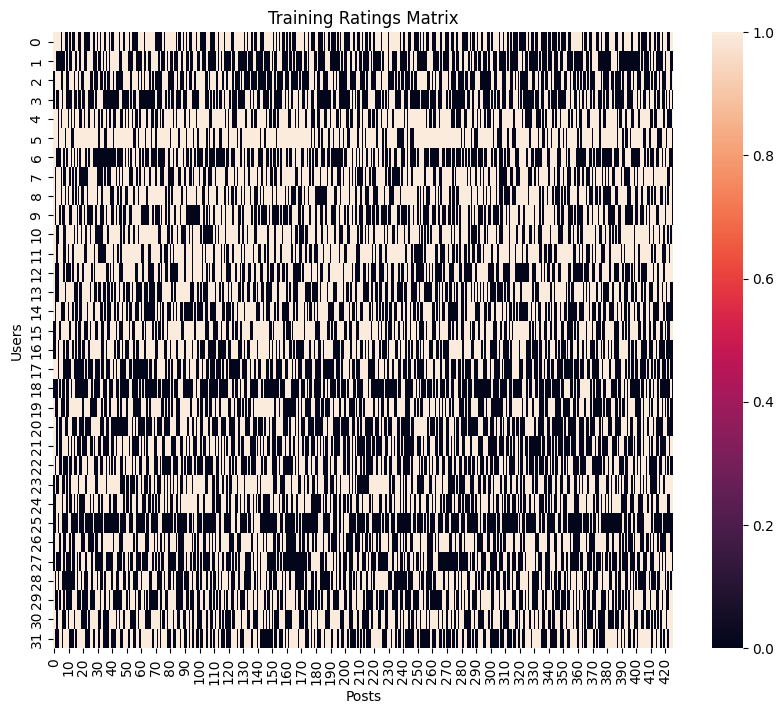

------------------------------------------------------
user similarity shape:  (32, 32)
user similarity:  [[1.         0.44636945 0.48106148 ... 0.55781205 0.51931809 0.54833   ]
 [0.44636945 1.         0.34985899 ... 0.43876828 0.41861723 0.46483484]
 [0.48106148 0.34985899 1.         ... 0.45732108 0.47900125 0.44595087]
 ...
 [0.55781205 0.43876828 0.45732108 ... 1.         0.5016725  0.50359206]
 [0.51931809 0.41861723 0.47900125 ... 0.5016725  1.         0.54161383]
 [0.54833    0.46483484 0.44595087 ... 0.50359206 0.54161383 1.        ]]
------------------------------------------------------


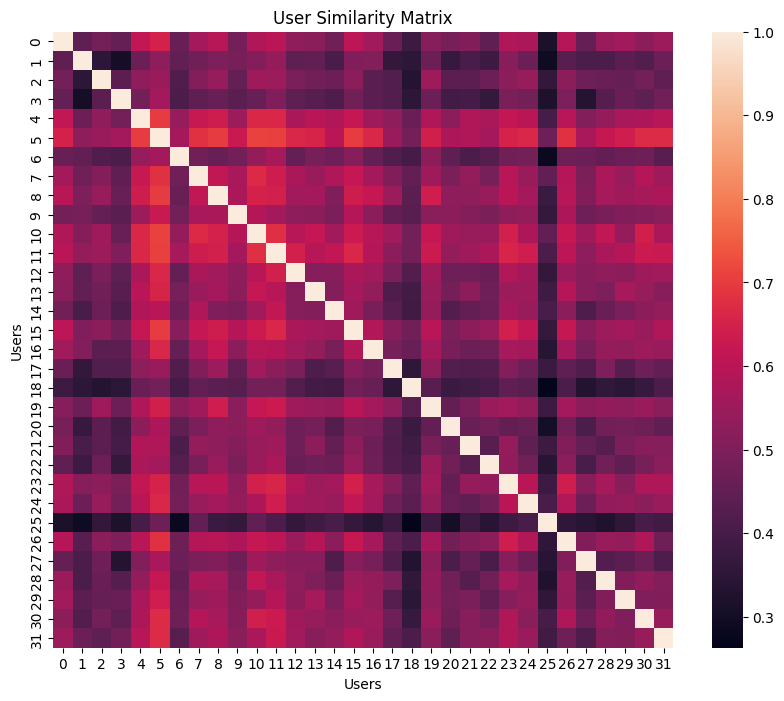

Processing recommendations for user index: 0
post score rate:  [11.10633469  7.89934215  7.9681279   8.37497063 10.69172848  9.78553288
  6.03294544  7.86051936  9.12455435  9.25065224  9.2560098   7.46803593
  8.02278655  8.97928639  9.83261781  8.3230604   7.90953371  5.69567836
  9.08348141  6.6928734   8.14358367 10.17566092 10.09829127  9.17540108
  9.22665739  5.36899613  7.04720698 10.30195478 10.40938749  9.37844758
  9.82791858  7.98040526  8.88450059  9.30460834 10.30267779  7.88214492
  6.68551662  9.3477772   7.41877415  9.65497431  8.65387313  9.8681506
  9.80992574  9.72848656  8.459259    7.25929316  8.33313473  8.72846935
  8.32687882 11.48114662  7.20649522  8.91655139  8.51069119 11.82523958
  7.24530728 10.0508658  11.14990868  6.52513667 11.84119664  6.08979908
 10.13252055  6.4862422   8.50249726 10.0189136   9.55016146  8.41192534
 10.17348786 10.56202382  7.04561519  7.15857502  8.14565309 10.54042573
 10.1932007   9.12147507  9.02100684  7.92311785  8.36725437  

c:\Users\estar\Project Python\Collaborative Filtering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\estar\Project Python\Collaborative Filtering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\estar\Project Python\Collaborative Filtering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

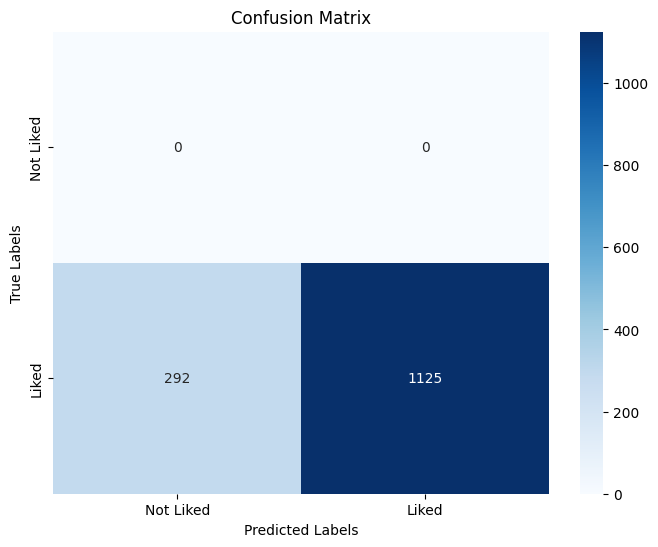

c:\Users\estar\Project Python\Collaborative Filtering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\estar\Project Python\Collaborative Filtering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\estar\Project Python\Collaborative Filtering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.89      1417

    accuracy                           0.79      1417
   macro avg       0.50      0.40      0.44      1417
weighted avg       1.00      0.79      0.89      1417

Mean Absolute Error: 0.20606916019760058
Precision: 1.0
Recall: 0.7939308398023994
F1 Score: 0.8851298190401259
Precision: 1.0
Recall: 0.7939308398023994
F1 Score: 0.8851298190401259


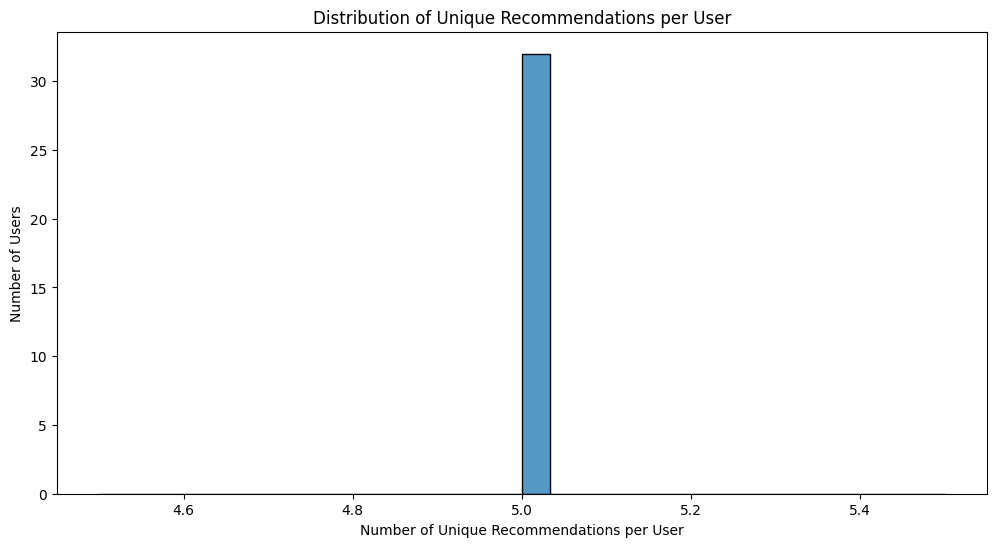

Recommendations for user 66a0ae5660cb65cbc9feb87b: ['66a7ed8ed84c8562211dc6fe', '66a7ed8ed84c8562211dc655', '66a7ed8ed84c8562211dc796', '66a7ed8ed84c8562211dc644', '66a7ed8ed84c8562211dc6bf']
Recommendations for user 669c0b8e2ea43ac3b0c83bd9: ['66a7ed8ed84c8562211dc655', '66a7ed8ed84c8562211dc772', '66a7ed8ed84c8562211dc705', '66a7ed8ed84c8562211dc66d', '66a7ed8dd84c8562211dc5f6']
Recommendations for user 669c0b8e2ea43ac3b0c83bd2: ['66a7ed8ed84c8562211dc6fe', '66a7ed8ed84c8562211dc6bf', '66a7ed8dd84c8562211dc60c', '66a7ed8ed84c8562211dc75e', '66a7ed8ed84c8562211dc653']
Recommendations for user 66a0ae5660cb65cbc9feb871: ['66a7ed8ed84c8562211dc772', '66a7ed8dd84c8562211dc5f1', '66a7ed8ed84c8562211dc652', '66a7ed8dd84c8562211dc5f5', '66a7ed8ed84c8562211dc678']
Recommendations for user 66a0ae5660cb65cbc9feb87e: ['66a7ed8ed84c8562211dc64d', '66a7ed8ed84c8562211dc6bf', '66a7ed8ed84c8562211dc675', '66a7ed8ed84c8562211dc705', '66a7ed8ed84c8562211dc653']


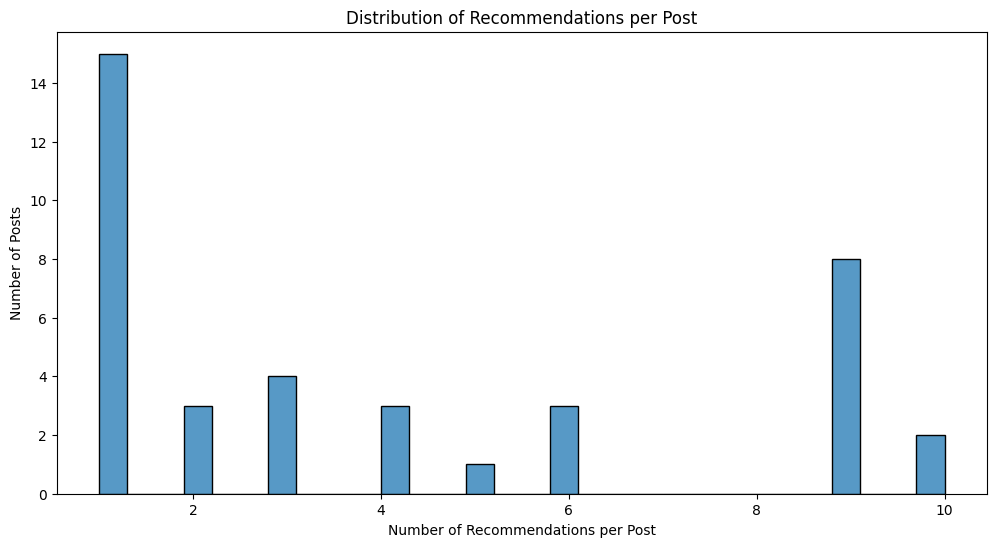

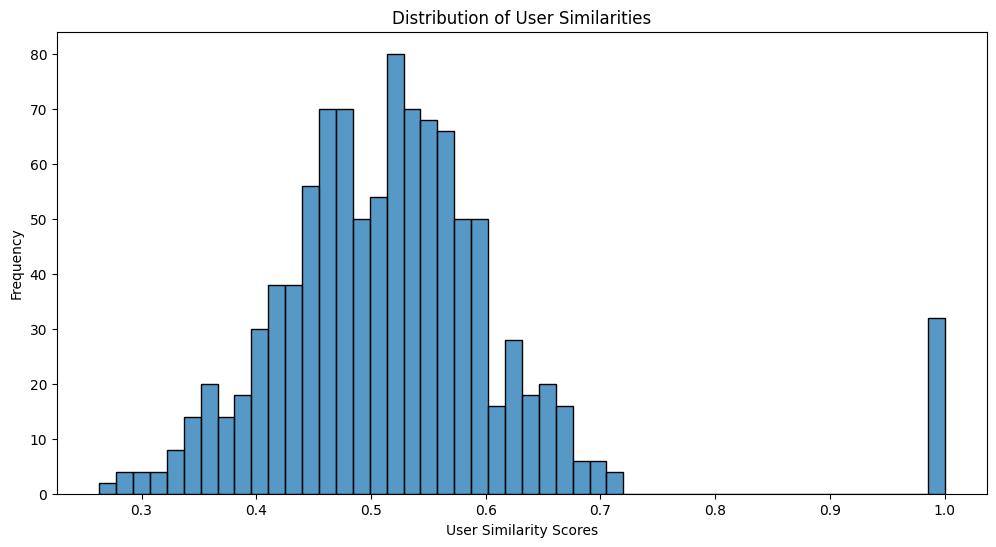

In [102]:
def visualize_user_similarity(user_similarity):
    # Distribution of user similarities
    similarity_scores = user_similarity.flatten()
    plt.figure(figsize=(12, 6))
    sns.histplot(similarity_scores, bins=50, kde=False)
    plt.xlabel('User Similarity Scores')
    plt.ylabel('Frequency')
    plt.title('Distribution of User Similarities')
    plt.show()

# Train the model
result = train_model()

if result is not None:
    train_matrix, recommendations, user_similarity = result
    # Visualize the recommendations and user similarities
    visualize_recommendations(recommendations)
    visualize_user_similarity(user_similarity)
else:
    print("Gagal melatih model. Tidak dapat melanjutkan.")


